In [269]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


class ANDPerceptron:

    def __init__(self):
        self.pereceptron_weights = np.random.rand(3)
        self.data_set = None
        self.alpha = 1e-4

    def step_function(self,x):
        return 1 if x > 0 else -1

    def perceptron(self,input_vector): # Based on AND gate
        input_vector = [1] + input_vector
        weighted_sum = sum(w * x for w, x in zip(self.pereceptron_weights, input_vector))
        return self.step_function(weighted_sum)

    def update_weights(self, input_vector, desired_output, current_output, delta_weights):
        error = desired_output - current_output
        delta_weights[0] += self.alpha * error
        delta_weights[1] += self.alpha * input_vector[0] * error
        delta_weights[2] += self.alpha * input_vector[1] * error
        return delta_weights

    def repeat_experiment(self):
        np.random.seed(None) 
        iterations = []
        for _ in range(30):
            self.pereceptron_weights = np.random.rand(3) 
            iteration = self.ex1(silent=True) 
            iterations.append(iteration)
        average_iterations = np.mean(iterations)
        std_dev_iterations = np.std(iterations)
        print(f"Average iterations to converge: {average_iterations}")
        print(f"Standard deviation of iterations to converge: {std_dev_iterations}")
        plt.boxplot(iterations)
        plt.title('Box plot of iterations to converge')
        plt.ylabel('Iterations')
        plt.show()

    def ex1(self, silent=False):
        input_patterns = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
        desired_response_and = [-1, -1, -1, 1]
        if not silent:
            print("Testing AND gate")
        iteration = 0
        while True:
            delta_weights = [0, 0, 0]
            errors = []
            for input_pattern, desired_output in zip(input_patterns, desired_response_and):
                current_output = self.perceptron(input_pattern)
                error = desired_output - current_output
                errors.append(error)
                if iteration == 0 and not silent:
                    print(f"Input: {input_pattern}, Desired Output: {desired_output}, Perceptron Output: {current_output}, Error: {error}")
                delta_weights = self.update_weights(input_pattern, desired_output, current_output, delta_weights)
            self.pereceptron_weights = [w + dw for w, dw in zip(self.pereceptron_weights, delta_weights)]
            if all(error == 0 for error in errors):
                break
            iteration += 1
        if not silent:
            print(f"Final weights values: {self.pereceptron_weights}")
            print(f"Converged after {iteration} iterations")
        return iteration
        
    def experiment_with_alpha(self):
        np.random.seed(42)  
        alphas = [1e-4, 1e-3, 1e-1, 1e+1]  
        results = []
        for alpha in alphas:
            self.alpha = alpha
            iterations = []
            for _ in range(30):  
                self.pereceptron_weights = np.random.rand(3)  
                iteration = self.ex1(silent=True) 
                iterations.append(iteration)
            average_iterations = np.mean(iterations)
            std_dev_iterations = np.std(iterations)
            results.append((average_iterations, std_dev_iterations))

        averages, std_devs = zip(*results)
        plt.errorbar(alphas, averages, yerr=std_devs, fmt='o')
        plt.title('Average and standard deviation of iterations to converge for different alphas')
        plt.xlabel('Alpha')
        plt.legend([alphas])
        plt.ylabel('Iterations')
        plt.xscale('log')
        plt.show()

        plt.errorbar(alphas[2:], averages[2:], yerr=std_devs[2:], fmt='o')
        plt.title('Average and standard deviation of iterations to converge for different alphas')
        plt.xlabel('Alpha')
        plt.legend([alphas[2:]])
        plt.ylabel('Iterations')
        plt.xscale('log')
        plt.show()

    def adjust_labels(self, labels):
        return [1 if label == 1 else -1 for label in labels]

In [270]:
percepron = ANDPerceptron()
percepron.ex1()

Testing AND gate
Input: [-1, -1], Desired Output: -1, Perceptron Output: -1, Error: 0
Input: [-1, 1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, -1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, 1], Desired Output: 1, Perceptron Output: 1, Error: 0
Final weights values: [-0.0004598811526451493, 0.8413143064099282, 0.841393941811393]
Converged after 1212 iterations


1212

Now the ex1_1 function works as AND perceptron. But since the weights are random the output is not always correct. We would need to train the perceptron to get the correct weights. after training the perceptron we eventually get the correct results, but it takes 1212 iterations to get there. This is because the learning rate is too small.

Average iterations to converge: 1713.0333333333333
Standard deviation of iterations to converge: 710.6884682396985


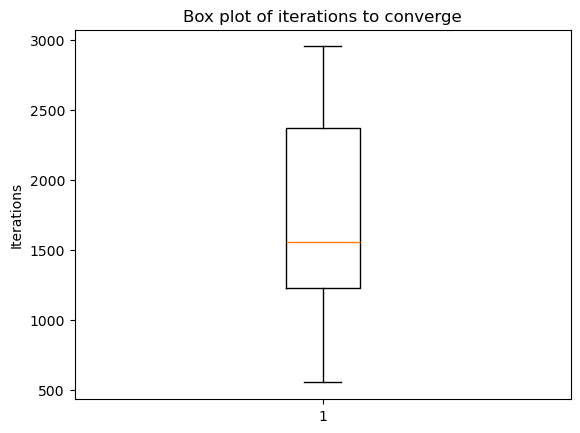

In [271]:
percepron.repeat_experiment()

After 30 experiments we get the following results. Average number of iterations: 1743.67, Standard deviation: 808.23
Some trials needed even more than 3000 iterations to get the correct weights, but some needed only 100 iterations. 

 The standard deviation is quite high, so the results vary a lot. The reason for this is that the learning rate is too small, so the perceptron needs a lot of iterations to get the correct weights. If we increase the learning rate, we can get the correct weights faster. But if the learning rate is too big, the perceptron might not converge at all. The learning rate is a hyperparameter that needs to be tuned.

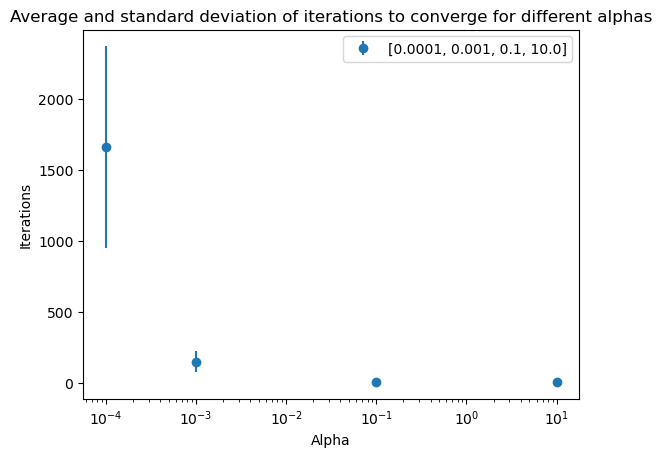

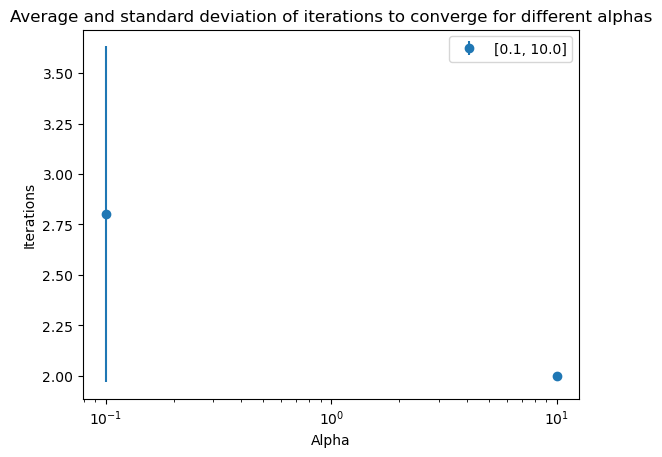

In [272]:
percepron.experiment_with_alpha()

After testing different alpha values, we found that the best value is 1e+1. we can clearly see that the average number of iterations is much lower than before. The average number of iterations is 2, and the standard deviation is 0. The reason for this is that the learning rate is now big enough, so the perceptron converges much faster. With alpaha = 1e-1 we still se some variation in the results. Its really satysfying to see that the perceptron converges so fast. Especially, that the first tries with alpha = 1e-3 needed sometimes even more than 3000 iterations to converge.

In [273]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

class PerceptronClassifier:
    def __init__(self, learning_rate=10, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def step_function(self, x):
        return np.where(x > 0, 2, 1)

    def perceptron(self, input_patterns, desired_response):
        num_inputs = len(input_patterns[0])
        self.weights = np.random.rand(num_inputs + 1)  
        input_patterns = np.insert(input_patterns, 0, 1, axis=1)  
        epochs_to_success = 0

        for epoch in range(self.epochs):
            delta_weights = np.zeros(num_inputs + 1)  
            error_zero = True
            for i in range(len(input_patterns)):
                input_pattern = input_patterns[i]
                d = desired_response[i]
                o = self.step_function(np.dot(self.weights, input_pattern))
                error = d - o
                if error != 0:
                    error_zero = False
                delta_weights += self.learning_rate * error * input_pattern

            if error_zero:
                epochs_to_success = epoch + 1
                break

            self.weights += delta_weights

        return epochs_to_success
    
    def generate_dataset(self):
        np.random.seed(42)
        samples_num = 100
        mean_a = [3, 3]
        cov_a = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean_a, cov_a, samples_num).T
        a_labeled = np.vstack((a, np.full(samples_num, 1)))

        mean_b = [-3, -3]
        cov_b = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean_b, cov_b, samples_num).T
        b_labeled = np.vstack((b, np.full(samples_num, 2)))

        c = np.concatenate((a_labeled, b_labeled), axis=1)
        c = c.T
        np.random.shuffle(c)

        plt.scatter(a[0], a[1], c='red', label='Label 1')
        plt.scatter(b[0], b[1], c='blue', label='Label -1')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Generated Dataset')
        plt.legend()
        plt.show()

        return c

    def classify_and_plot(self, input_patterns, real_labels):
        classified_labels = self.step_function(np.dot(np.insert(input_patterns, 0, 1, axis=1), self.weights))

        final_labels = []
        for i in range(len(classified_labels)):
            if real_labels[i] == 1 and classified_labels[i] == 1:
                final_labels.append(0)
            if real_labels[i] == 1 and classified_labels[i] == 2:
                final_labels.append(1)
            if real_labels[i] == 2 and classified_labels[i] == 1:
                final_labels.append(2)
            if real_labels[i] == 2 and classified_labels[i] == 2:
                final_labels.append(3)

        final_labels = np.array(final_labels)

        plt.scatter(input_patterns[final_labels == 0, 0], input_patterns[final_labels == 0, 1], c='red',
                    label='Points labeled 1 classified as 1')
        plt.scatter(input_patterns[final_labels == 1, 0], input_patterns[final_labels == 1, 1], c='blue',
                    label='Points labeled 1 classified as 2')
        plt.scatter(input_patterns[final_labels == 2, 0], input_patterns[final_labels == 2, 1], c='orange',
                    label='Points labeled 2 classified as 1')
        plt.scatter(input_patterns[final_labels == 3, 0], input_patterns[final_labels == 3, 1], c='green',
                    label='Points labeled 2 classified as 2')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Perceptron Classification')
        plt.legend()
        plt.show()

    def run(self):
        dataset = self.generate_dataset()
        input_patterns = dataset[:, :-1]
        real_labels = dataset[:, -1]
        self.perceptron(input_patterns, real_labels)
        self.classify_and_plot(input_patterns, real_labels)

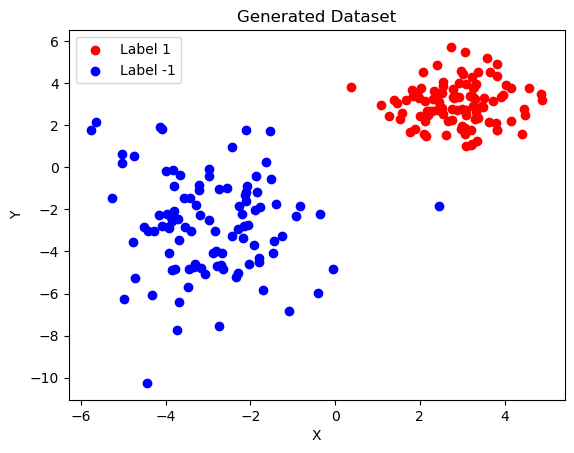

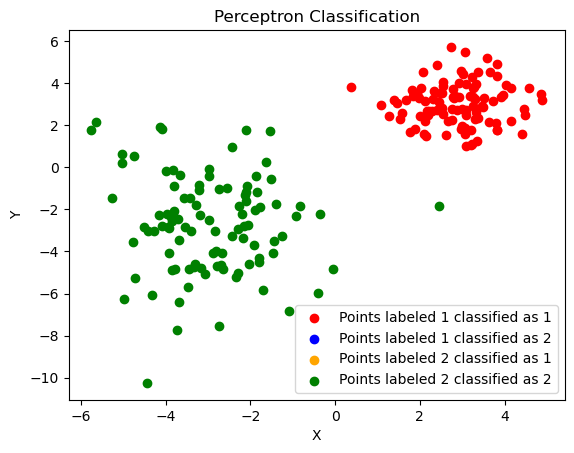

In [274]:
classifier = PerceptronClassifier()

classifier.run()

All the points were labeled correctly. we can see that the perceptron works as expected. The perceptron is able to learn the weights for the AND function. it is suprisingly accurate. Both sets were separated without any mistake - 100% accuracy. 

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

class SupervisedLearning_2:
    def __init__(self):
        self.iris = load_iris()

    def knn_classifier(self, k_values=[3, 7, 11], num_trials= 10):
        results = {k: [] for k in k_values}

        for _ in range(num_trials):
            X_train, X_test, y_train, y_test = train_test_split(self.iris.data, self.iris.target, test_size=0.3)

            for k in k_values:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train)

                y_pred = knn.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                results[k].append(accuracy)

        for k, accuracies in results.items():
            plt.plot(range(num_trials), accuracies, label=f'k={k}')
        plt.xlabel('Trial')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

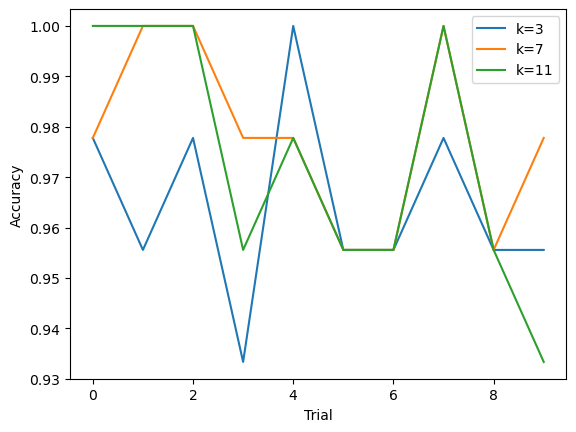

In [276]:
learner_2 = SupervisedLearning_2()
learner_2.knn_classifier()

Choosing an odd number for k in the k-Nearest Neighbors algorithm helps to avoid ties. If we choose an even number for k, we might get a tie. For example, if we have 4 neighbors and 2 of them are class 1 and 2 of them are class 2, we get a tie. But if we choose an odd number for k, we will never get a tie. For example, if we have 5 neighbors and 2 of them are class 1 and 3 of them are class 2, we will never get a tie.


In [277]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class SupervisedLearning_3:
    def __init__(self):
        self.iris = load_iris()

    def transform_to_categories(self, data):
        bins = [-np.inf, 0.33, 0.67, np.inf]
        data = pd.DataFrame(data).apply(lambda x: pd.cut(x, bins=bins, labels=["low", "medium", "high"]))
        return data
        
    def naive_bayes_classifier(self, num_trials=10):
        results = []

        for _ in range(num_trials):
            X_train, X_test, y_train, y_test = train_test_split(self.iris.data, self.iris.target, test_size=0.3)

            X_train = self.transform_to_categories(X_train)
            X_test = self.transform_to_categories(X_test)

            le = LabelEncoder()
            X_train = X_train.apply(le.fit_transform)
            X_test = X_test.apply(le.transform)

            gnb = GaussianNB()
            gnb.fit(X_train, y_train)

            y_pred = gnb.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            results.append(accuracy)

        plt.plot(range(num_trials), results)
        plt.xlabel('Trial')
        plt.ylabel('Accuracy')
        plt.show()

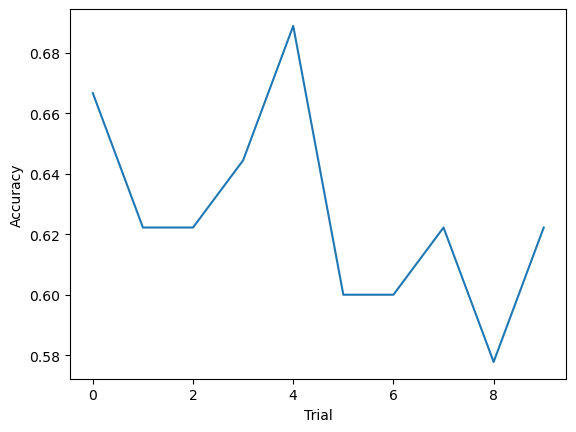

In [278]:
learner_3 = SupervisedLearning_3()
learner_3.naive_bayes_classifier()

niave_bayes seems1